# 1. Data Preprocessing dan Eksplorasi Data
a. Impor pustaka yang dibutuhkan

In [ ]:
#import pustaka yang diperlukan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder


b. Memuat dataset

In [ ]:
# Impor pustaka yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import os

# Unduh dataset dari URL
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip"
download_path = "student.zip"

# Unduh file ZIP
if not os.path.exists(download_path):
    import urllib.request
    urllib.request.urlretrieve(url, download_path)

# Ekstrak file yang diperlukan
with zipfile.ZipFile(download_path, 'r') as zip_ref:
    zip_ref.extractall("student_data")

# Baca data matematika
df_math = pd.read_csv("student_data/student-mat.csv", sep=';')

# Baca data portugis
df_port = pd.read_csv("student_data/student-por.csv", sep=';')

# Gabungkan kedua data menjadi satu dataset
df = pd.concat([df_math, df_port], axis=0)



c. Eksplorasi Data Awal

In [ ]:
#menampilkan data shape dan info data
print('Data Shape:',df.shape)
print(df.info())
display(df.head())

Data Shape: (1044, 33)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1044 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   object
 5   Pstatus     1044 non-null   object
 6   Medu        1044 non-null   int64 
 7   Fedu        1044 non-null   int64 
 8   Mjob        1044 non-null   object
 9   Fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   object
 16  famsup      1044 non-null   object
 17  paid        1044 non-null   object
 18  activities  1044 non-null   object
 19  nursery     1044 non-null 

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [ ]:
#menampikan unique value dari categorical columns
print('Catagorical Column\'s Values\n')
for col in df.select_dtypes(exclude=np.number).columns:
    unique = df[col].unique()
    print('-'*7,f'columns {col}','-'*7)
    print(f'There are {len(unique)} Unique values')
    print(f'5 of which are: {unique[:5]}\n')

Catagorical Column's Values

------- columns school -------
There are 2 Unique values
5 of which are: ['GP' 'MS']

------- columns sex -------
There are 2 Unique values
5 of which are: ['F' 'M']

------- columns address -------
There are 2 Unique values
5 of which are: ['U' 'R']

------- columns famsize -------
There are 2 Unique values
5 of which are: ['GT3' 'LE3']

------- columns Pstatus -------
There are 2 Unique values
5 of which are: ['A' 'T']

------- columns Mjob -------
There are 5 Unique values
5 of which are: ['at_home' 'health' 'other' 'services' 'teacher']

------- columns Fjob -------
There are 5 Unique values
5 of which are: ['teacher' 'other' 'services' 'health' 'at_home']

------- columns reason -------
There are 4 Unique values
5 of which are: ['course' 'other' 'home' 'reputation']

------- columns guardian -------
There are 3 Unique values
5 of which are: ['mother' 'father' 'other']

------- columns schoolsup -------
There are 2 Unique values
5 of which are: ['yes' '

d. Visualisasi Data

# Uni-Variant Analysis
Categorical data

**Bar chart**




In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def bar_matrix(df, cols, nrows=3, annot=True, title='You Forget Your Title!'):
    n = len(cols)
    ncols = n // nrows
    if n % nrows != 0:
        ncols += 1
    #membuat gambar dab subplot
    fig, axes = plt.subplots(nrows, ncols, figsize=(ncols * 4, nrows * 3), constrained_layout=True)
    plt.suptitle(f'{title}', size=20, fontweight='bold', fontfamily='serif')
    axes = axes.ravel()

    for i in range(n):
        ax = axes[i]
        col = cols[i]

        #periksa apakah kolom ada dalam DataFrame
        if col in df.columns:
            sns.countplot(x=col, data=df, color=sns.color_palette()[0], ax=ax)
            ax.set_xlabel("")
            ax.set_title(col + '_Column')
            ax.set_ylim(0, max(ax.get_ylim()) + max(ax.get_ylim()) / 8)

            if annot:
                #menambahkan anotasi presentase di atas setiap bar
                for p in ax.patches:
                    x = p.get_x() + 0.2
                    y = p.get_height() + 1
                    percentage = '{:.1f}%'.format(100 * p.get_height() / df.shape[0])
                    ax.annotate(percentage, (x, y))
        else:
            #untuk mengatur kolom yang tidak ada dalam DataFrame
            ax.remove()

    # Menampilkan subplot kosong yang tersisa
    for i in range(n, nrows * ncols):
        axes[i].remove()

    # Menampilkan gambar plot
    plt.show()


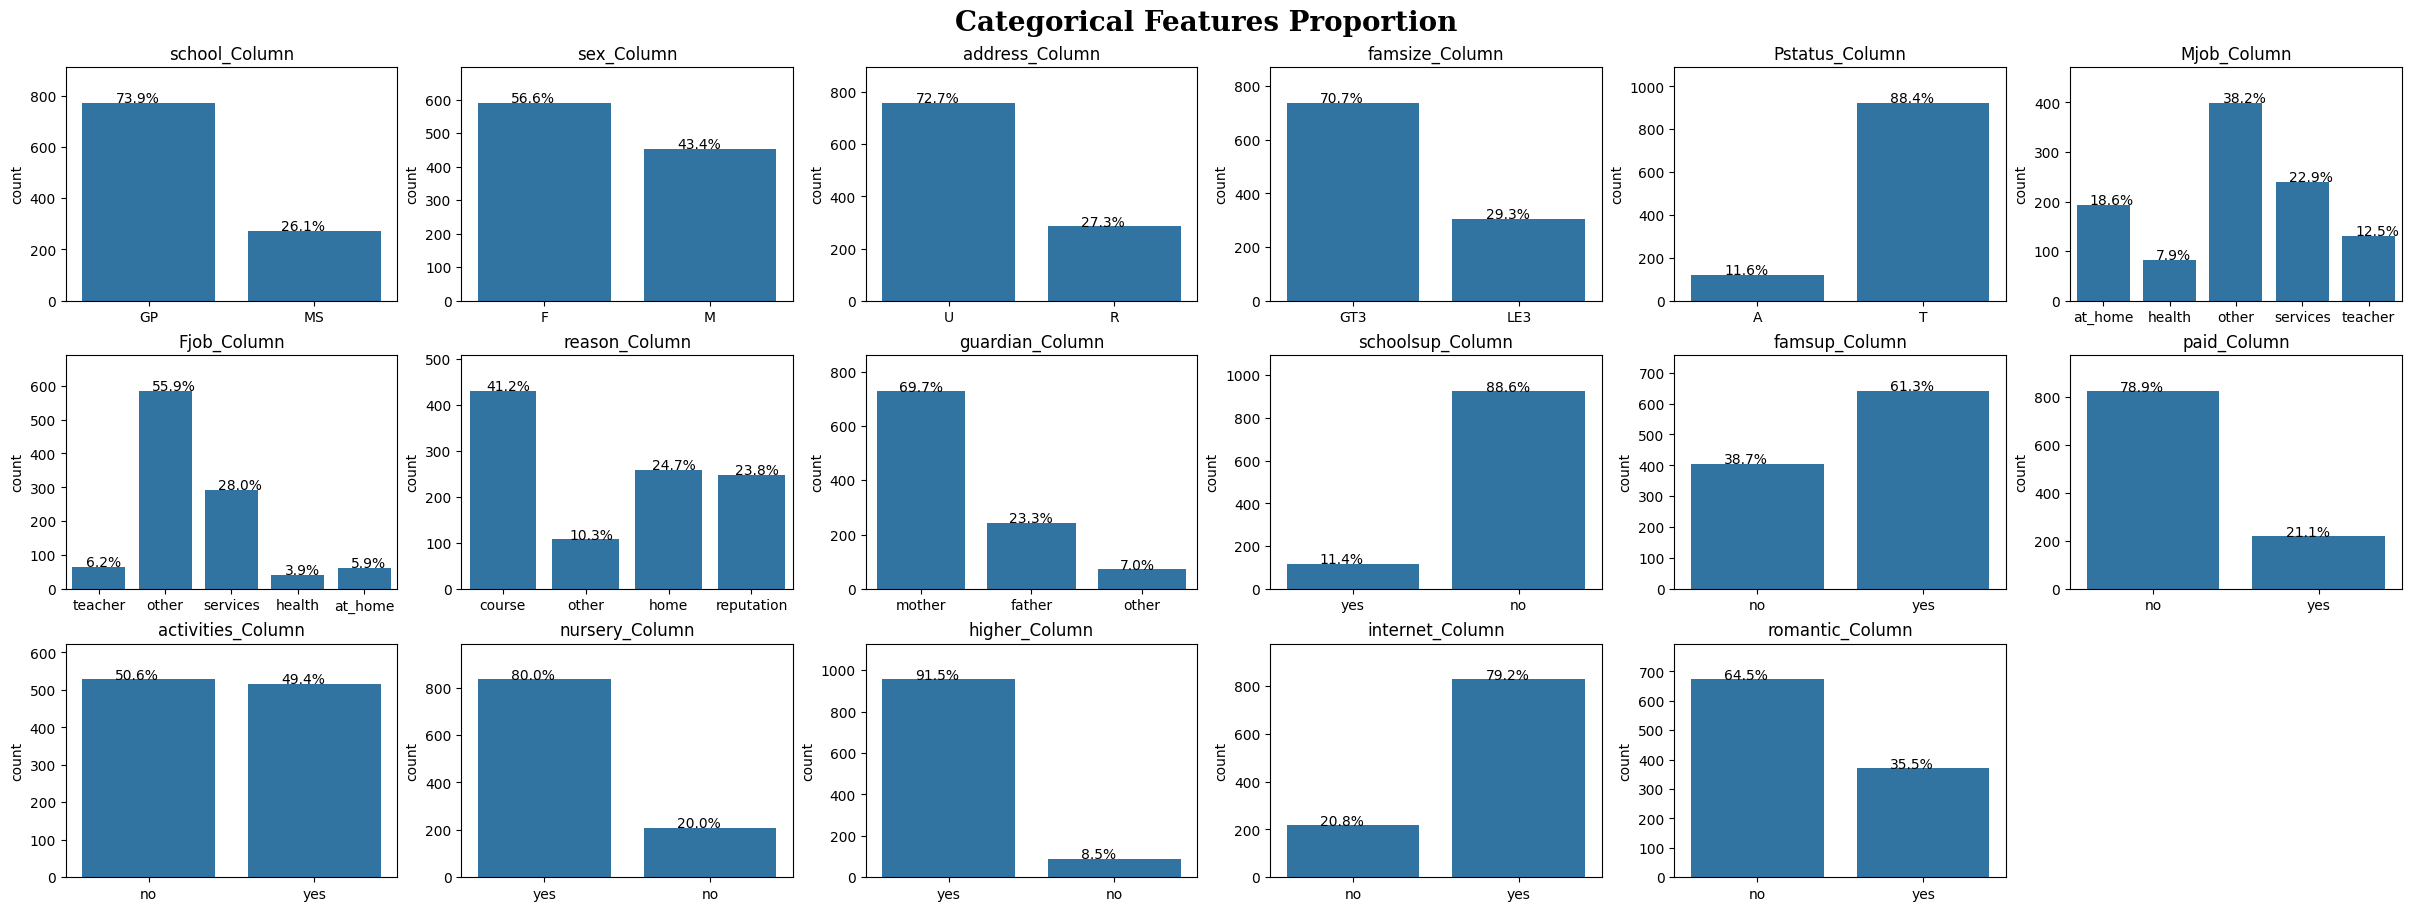

In [ ]:
#membuat diagram batang berdasarkan categorical
cat_columns = ['school','sex','address','famsize','Pstatus','Mjob','Fjob','reason','guardian',
               'schoolsup','famsup','paid','activities','nursery','higher','internet','romantic']  # Replace with your categorical column names

# Memanggil fungsi 'bar_matrix'dengan DataFrame dan nama kolom
bar_matrix(df, cat_columns, annot=True, title='Categorical Features Proportion')

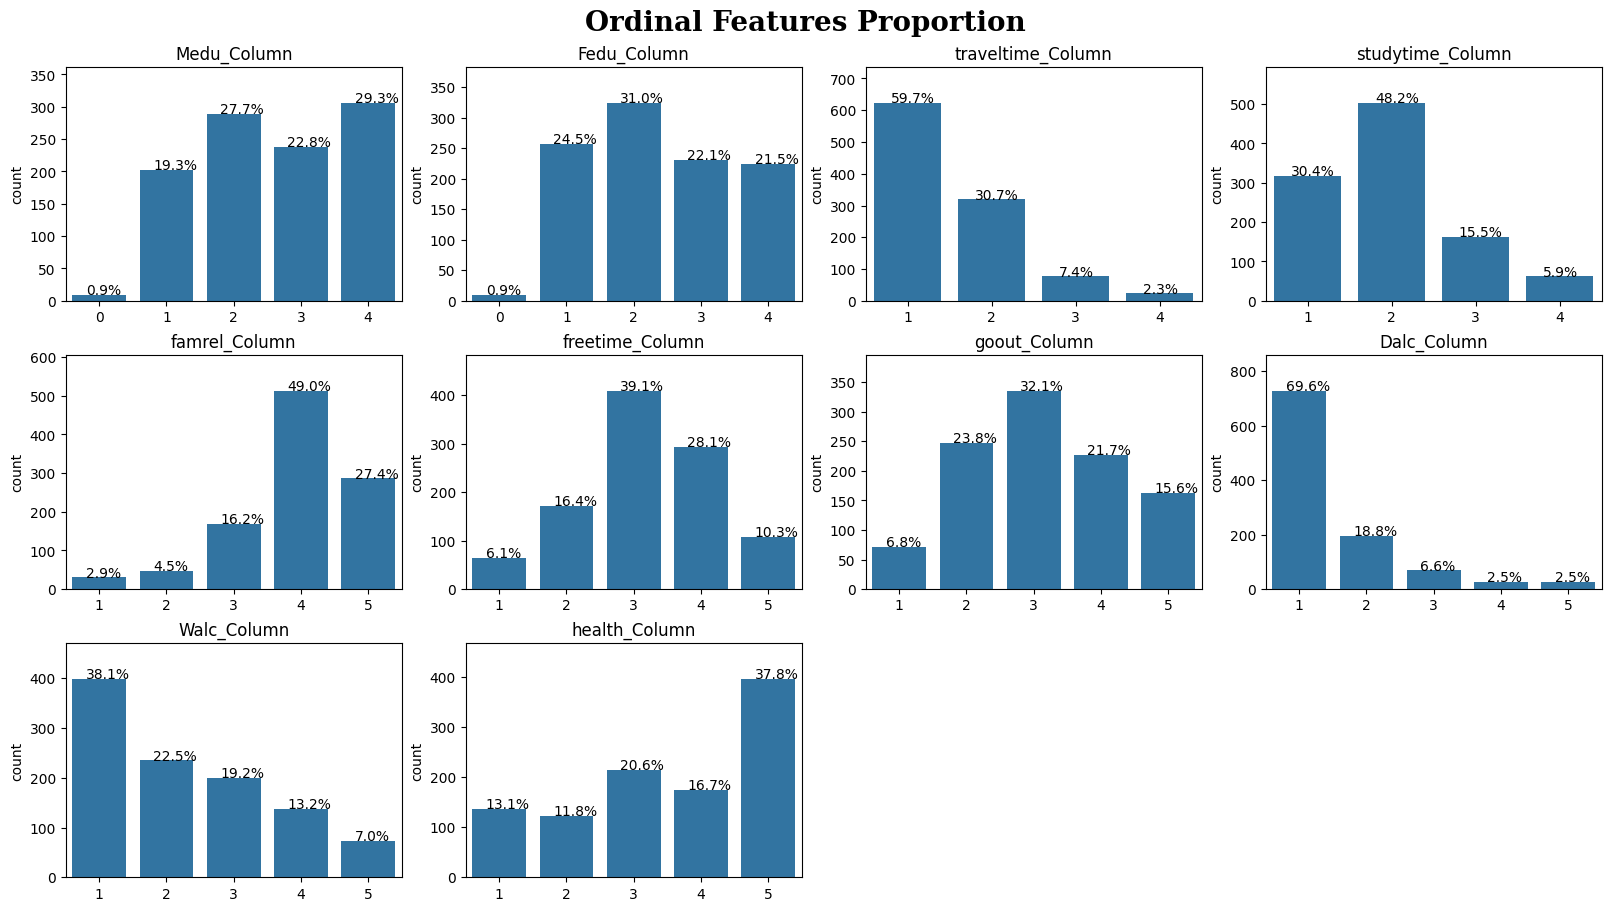

In [ ]:
#membuat diagram batang berdasarkan Ordinal (data numerik)
num_columns = ['Medu','Fedu','traveltime','studytime','famrel','freetime','goout','Dalc','Walc','health']
bar_matrix(df,num_columns,annot=True,title='Ordinal Features Proportion')

Numerical data

In [ ]:
# Data numerik
print('-'*15,'\nNumeric Data Statistics\033[1;0m')
display(df.select_dtypes(include=np.number).describe())

--------------- 
Numeric Data Statistics


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,16.726054,2.603448,2.387931,1.522989,1.970307,0.264368,3.935824,3.201149,3.156130,1.494253,2.284483,3.543103,4.434866,11.213602,11.246169,11.341954
std,1.239975,1.124907,1.099938,0.731727,0.834353,0.656142,0.933401,1.031507,1.152575,0.911714,1.285105,1.424703,6.210017,2.983394,3.285071,3.864796
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.000000,9.000000,10.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


e. Preprocessing

In [ ]:
# Mengubah kategori menjadi angka dengan LabelEncoder
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Normalisasi data numerik
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)


# 2. Pembangunan Model **Baseline**
a. Impor pustaka yang dibutuhkan

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten

b. Membagi dataset menjadi train dan test

In [ ]:
X = df.drop(columns=['studytime'])
y = df['studytime']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


c. Bangun model baseline

In [ ]:
model_baseline = Sequential()
model_baseline.add(Conv1D(32, 2, activation='relu', input_shape=(X_train.shape[1], 1)))
model_baseline.add(Flatten())
model_baseline.add(Dense(64, activation='relu'))
model_baseline.add(Dense(1))

model_baseline.compile(optimizer='adam', loss='mean_squared_error')
model_baseline.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50
21/21 [==============================] - 1s 13ms/step - loss: 1.7354 - val_loss: 0.7059
Epoch 2/50
21/21 [==============================] - 0s 5ms/step - loss: 0.6825 - val_loss: 0.6798
Epoch 3/50
21/21 [==============================] - 0s 6ms/step - loss: 0.6149 - val_loss: 0.7306
Epoch 4/50
21/21 [==============================] - 0s 6ms/step - loss: 0.6126 - val_loss: 0.6818
Epoch 5/50
21/21 [==============================] - 0s 7ms/step - loss: 0.5818 - val_loss: 0.7291
Epoch 6/50
21/21 [==============================] - 0s 7ms/step - loss: 0.5802 - val_loss: 0.7388
Epoch 7/50
21/21 [==============================] - 0s 7ms/step - loss: 0.5489 - val_loss: 0.7274
Epoch 8/50
21/21 [==============================] - 0s 6ms/step - loss: 0.5479 - val_loss: 0.7057
Epoch 9/50
21/21 [==============================] - 0s 7ms/step - loss: 0.5595 - val_loss: 0.7022
Epoch 10/50
21/21 [==============================] - 0s 7ms/step - loss: 0.5370 - val_loss: 0.7322
Epoch 11/50
21/21 